## Сегментация с помощью Ultralytics и модели Segment Anything 2

Для начала, установим библиотеку Ultralytics:

In [1]:
%pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 665.5 kB/s eta 0:00:000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 863.7/863.7 kB 10.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 72.8 MB/s eta 0:00:00:00:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 1.26.4 which is incompatible.
cvxpy 1.3.2 requires setuptools>65.5.1, but you have setuptool

Чтобы библиотека стала видимой, на данном этапе возможно потребуется перезапустить Notebook Kernel.

Теперь возьмём какую-нибудь фотографию для экспериментов:

In [2]:
!wget https://soshnikov.com/images/official/shwars_spb.jpg

--2024-08-01 16:49:02--  https://soshnikov.com/images/official/shwars_spb.jpg
Resolving soshnikov.com (soshnikov.com)... 185.199.109.153, 185.199.108.153
Connecting to soshnikov.com (soshnikov.com)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 348208 (340K) [image/jpeg]
Saving to: ‘shwars_spb.jpg’

     0K .......... .......... .......... .......... .......... 14%  953K 0s
    50K .......... .......... .......... .......... .......... 29% 1.26M 0s
   100K .......... .......... .......... .......... .......... 44% 4.80M 0s
   150K .......... .......... .......... .......... .......... 58% 6.03M 0s
   200K .......... .......... .......... .......... .......... 73% 1.95M 0s
   250K .......... .......... .......... .......... .......... 88% 8.05M 0s
   300K .......... .......... .......... ..........           100% 8.66M=0.1s

2024-08-01 16:49:03 (2.29 MB/s) - ‘shwars_spb.jpg’ saved [348208/348208]



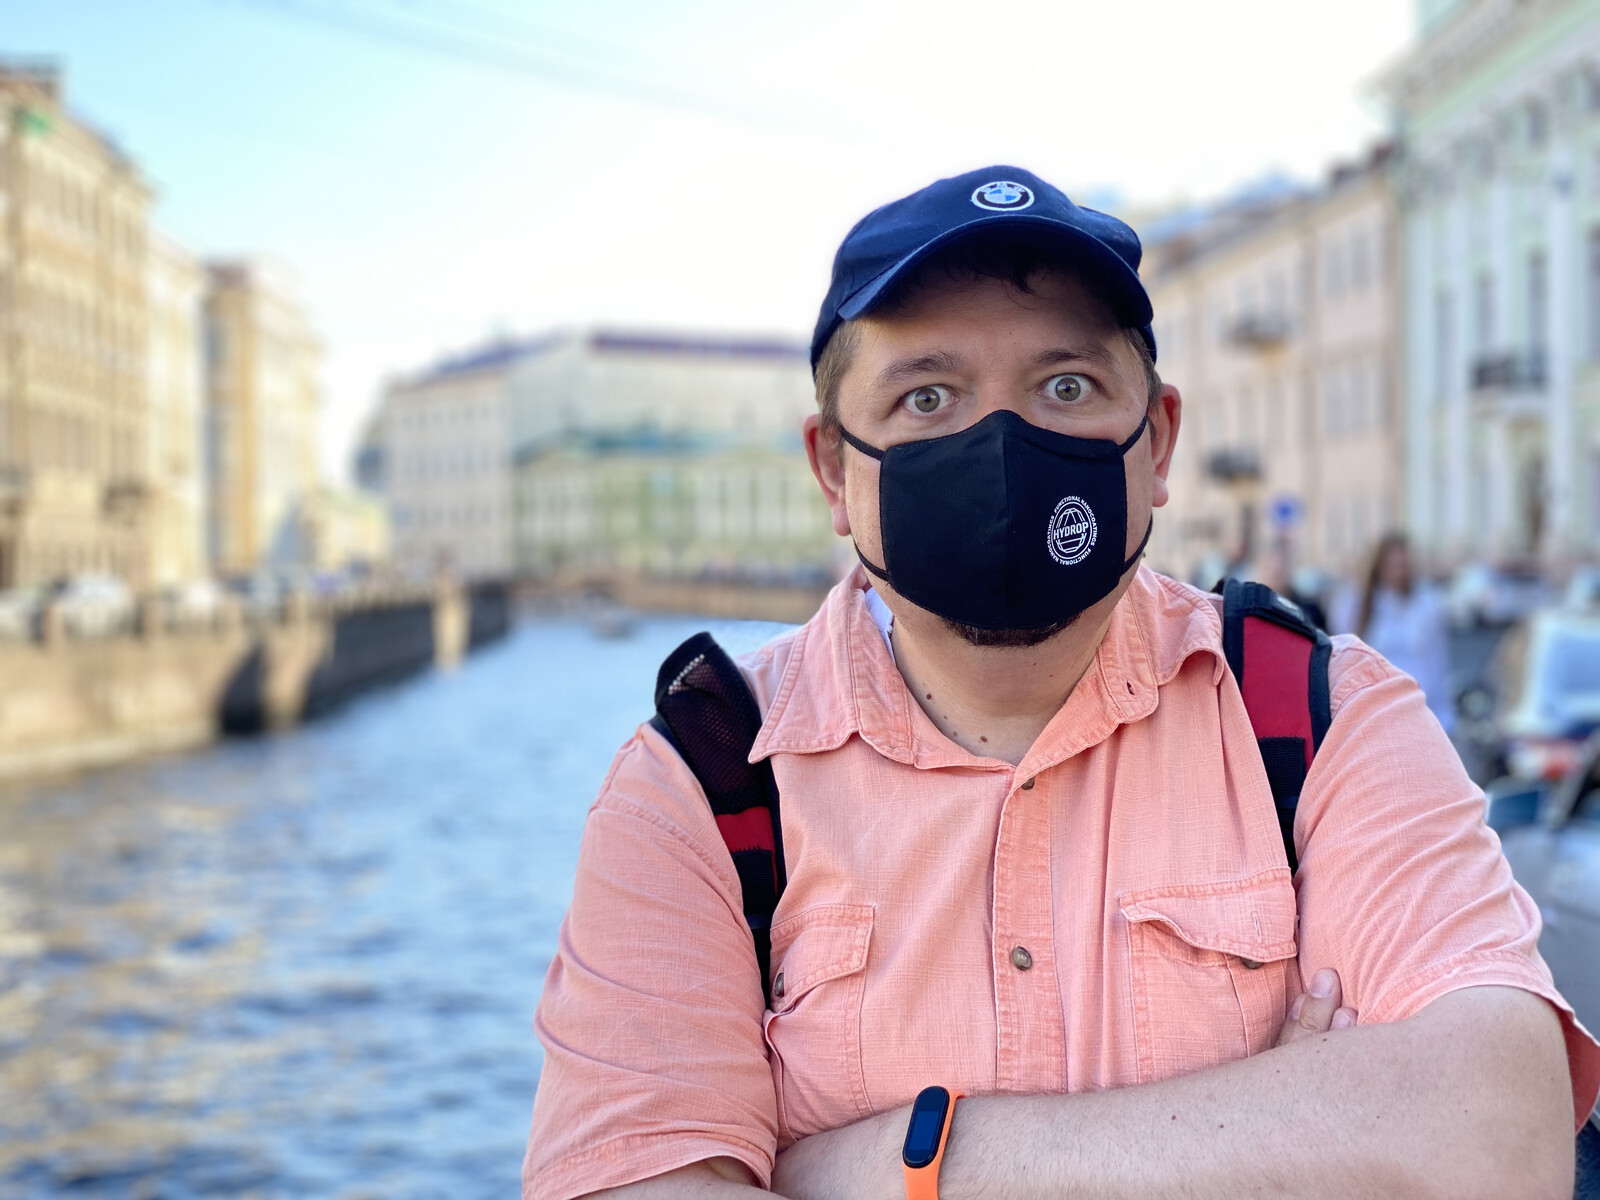

In [71]:
from PIL import Image
Image.open('shwars_spb.jpg')

Для начала надо найти на фотографии человека. Используем предобученную модель YOLO для Object Detection:

In [72]:
from ultralytics import YOLO

detector = YOLO()
res = detector("shwars_spb.jpg")[0]
res


image 1/1 /home/jupyter/work/resources/datasphere-practice/segment-anything/shwars_spb.jpg: 480x640 3 persons, 1 cell phone, 10.2ms
Speed: 3.1ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

Информация об объектах находится в `boxes`:

In [60]:
res.boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0., 67.,  0.], device='cuda:0')
conf: tensor([0.9318, 0.4627, 0.4104, 0.3233], device='cuda:0')
data: tensor([[5.2035e+02, 1.5625e+02, 1.5894e+03, 1.2000e+03, 9.3177e-01, 0.0000e+00],
        [1.3541e+03, 5.3526e+02, 1.4558e+03, 7.2400e+02, 4.6270e-01, 0.0000e+00],
        [9.0155e+02, 1.0856e+03, 9.4965e+02, 1.1696e+03, 4.1038e-01, 6.7000e+01],
        [1.3581e+03, 5.3401e+02, 1.4511e+03, 6.7515e+02, 3.2334e-01, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (1200, 1600)
shape: torch.Size([4, 6])
xywh: tensor([[1054.8523,  678.1268, 1069.0040, 1043.7463],
        [1404.9377,  629.6310,  101.7632,  188.7412],
        [ 925.5997, 1127.5929,   48.0991,   83.9587],
        [1404.5808,  604.5773,   93.0554,  141.1414]], device='cuda:0')
xywhn: tensor([[0.6593, 0.5651, 0.6681, 0.8698],
        [0.8781, 0.5247, 0.0636, 0.1573],
        [0.5785, 0.9397, 0.0301, 0.0700],
        [0.8779, 0.5038, 0

Посмотрим, какие классы умеет распознавать YOLO:

In [61]:
res.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

Нас интересует класс 0 - человек. Поэтому находим первую по счету запись с классом 0 - она же будет и с максимальным confidence, т.к. все объекты отсортированы по убыванию confidence.

In [63]:
box = 0,0,0,0
for c,b,cnf in zip(res.boxes.cls,res.boxes.xyxy,res.boxes.conf):
    if c==0:
        box = b
        break
print(f"Box: {b}")

Box: tensor([ 520.3502,  156.2537, 1589.3542, 1200.0000], device='cuda:0')


Теперь загрузим модель Segment Anything v2 (как описано [тут](https://docs.ultralytics.com/models/sam-2/)), и передадим координаты найденного Bounding box в функцию сегментации:

In [64]:
from ultralytics import SAM

# Load a model
model = SAM("sam2_b.pt")

# Run inference
res = model("shwars_spb.jpg",bboxes=box)[0]
res


image 1/1 /home/jupyter/work/resources/datasphere-practice/segment-anything/shwars_spb.jpg: 1024x1024 115.6ms
Speed: 7.6ms preprocess, 115.6ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)


ultralytics.engine.results.Results object with attributes:

boxes: None
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: '0'}
obb: None
orig_img: array([[[254, 228, 181],
        [254, 228, 181],
        [254, 228, 181],
        ...,
        [197, 206, 185],
        [199, 206, 185],
        [199, 206, 185]],

       [[254, 228, 181],
        [254, 228, 181],
        [255, 229, 182],
        ...,
        [198, 207, 186],
        [200, 207, 186],
        [200, 207, 186]],

       [[254, 228, 181],
        [254, 228, 181],
        [255, 229, 182],
        ...,
        [200, 207, 186],
        [200, 207, 186],
        [200, 207, 186]],

       ...,

       [[176, 155, 134],
        [178, 154, 134],
        [179, 155, 135],
        ...,
        [ 84,  48,  18],
        [ 82,  48,  19],
        [ 80,  48,  19]],

       [[177, 152, 132],
        [177, 152, 132],
        [178, 153, 133],
        ...,
        [ 83,  49,  20],
        [ 81,  48,  22],
        [ 78,  48,

У нас обнаружились маски следующей конфигурации:

In [65]:
res.masks.shape

torch.Size([1, 1200, 1600])

Нарисуем получившуюся маску:

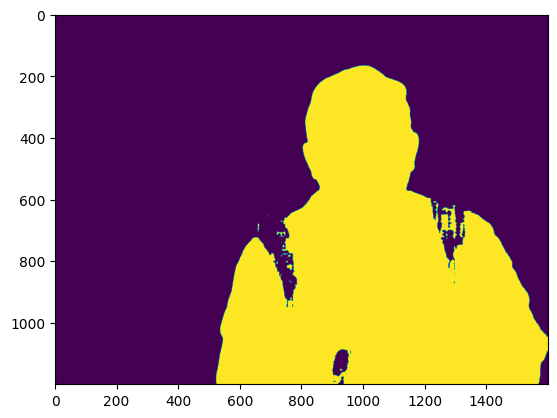

In [67]:
import matplotlib.pyplot as plt
import numpy as np

mask = res.masks[0].data[0].cpu().numpy()
plt.imshow(mask)

Теперь можем с помощью маски вырезать часть исходного изображения:

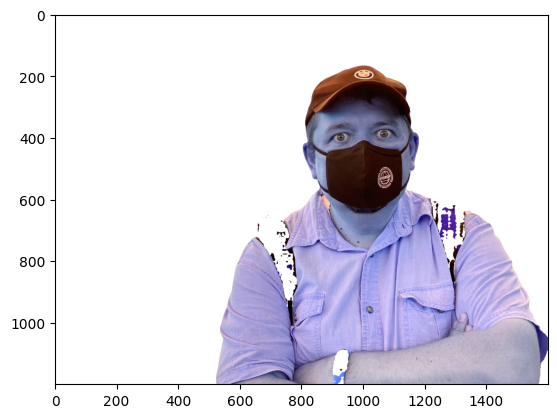

In [69]:
img = res.orig_img.copy()
img[~mask] = (255,255,255)
plt.imshow(img)

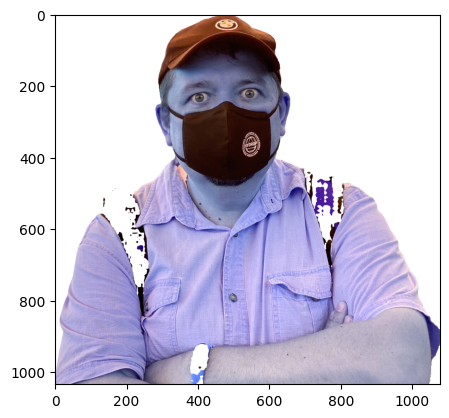

In [89]:
def trim(image):
    non_white_pixels = np.where(np.any(image < 255, axis=-1))
    top, bottom = non_white_pixels[0].min(), non_white_pixels[0].max()
    left, right = non_white_pixels[1].min(), non_white_pixels[1].max()
    return image[top:bottom+1, left:right+1]

plt.imshow(trim(img))

## Кошачьи мемы

Предположим, что в хранилище S3 у нас расположена коллекция фотографий с котиками. Пройдемся по всем фотографиям, задетектим котиков, и получим их изображения:

In [121]:
import os
path = "/home/jupyter/datasphere/s3/shwarstempstore/catmemes"
images = []
for fn in os.listdir(path):
    f = os.path.join(path,fn)
    res = detector(f)[0]
    for c,b in zip(res.boxes.cls,res.boxes.xyxy):
        print(c)
        if c==15: # cat
            r = model(f,bboxes=b)[0]
            mask = r.masks[0].data[0].cpu().numpy()
            i = r.orig_img.copy()
            i[~mask] = (255,255,255)
            images.append(trim(i))
            
print(f"{len(images)} cat faces found")


image 1/1 /home/jupyter/datasphere/s3/shwarstempstore/catmemes/grumpy.jpg: 448x640 1 cat, 10.8ms
Speed: 2.8ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
tensor(15., device='cuda:0')

image 1/1 /home/jupyter/datasphere/s3/shwarstempstore/catmemes/grumpy.jpg: 1024x1024 103.7ms
Speed: 6.1ms preprocess, 103.7ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /home/jupyter/datasphere/s3/shwarstempstore/catmemes/natasha.jpg: 448x640 2 cats, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)
tensor(15., device='cuda:0')

image 1/1 /home/jupyter/datasphere/s3/shwarstempstore/catmemes/natasha.jpg: 1024x1024 104.3ms
Speed: 6.2ms preprocess, 104.3ms inference, 0.2ms postprocess per image at shape (1, 3, 1024, 1024)
tensor(15., device='cuda:0')

image 1/1 /home/jupyter/datasphere/s3/shwarstempstore/catmemes/natasha.jpg: 1024x1024 103.9ms
Speed: 6.7ms preprocess, 103.9ms infe

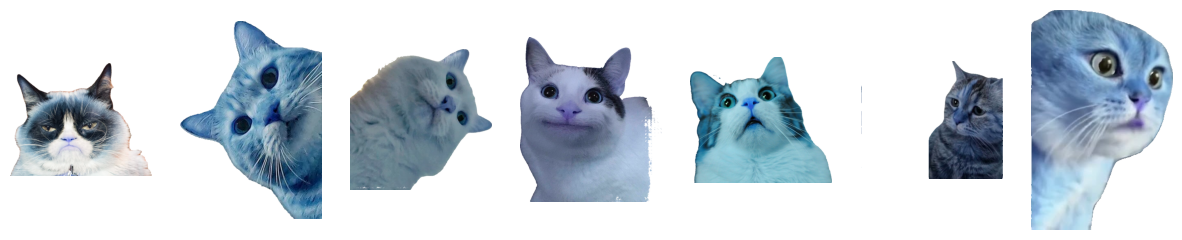

In [123]:
fig,ax = plt.subplots(1,len(images),figsize=(15,3))
for i,a in enumerate(images):
    ax[i].imshow(a)
    ax[i].axis('off')

Теперь мы можем использовать Yandex GPT для генерации случайных мемов с котиками. Для работы с Yandex GPT используем библиотеку [yandex_chain](http://github.com/yandex-datasphere/yandex-chain):

In [124]:
%pip install yandex_chain

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 917.3 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.5/973.5 kB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.9/378.9 kB 6.0 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.8/275.8 kB 4.3 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 2.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 938.1 kB/s eta 0:00:00a 0:00:01
  Created wheel for yandex_chain: filename=yandex_chain-0.0.8-py3-none-any.whl size=8413 sha256=88de9b66bd977d536a32a98f3c7c9cc2adf0427569f0f92337f4d0847540ed2c
  Stored in directory: /tmp/xdg_cache/pip/wheels/66/36/f5/43859afe9461bc9306b471dffbcbb638782badd8417a89d767
Successfully built yandex_chain
  Consider adding this directory to PATH 

Для работы с YandexGPT потребуется знать folder_id и api_key, мы предположим, что эти значения содержатся в секретах DataSphere:

In [132]:
from yandex_chain import YandexLLM, YandexGPTModel
LLM = YandexLLM(folder_id = os.environ['folder_id'], api_key = os.environ['api_key'],
                model = YandexGPTModel.Pro)
res = LLM(f"""
Придумай {len(images)} очень коротких смешных фраз-мемов про котиков, и выведи ответ в формате,
где каждая фраза взята в круглые скобки, и находится на новой строке, вот так:
(фраза №1)
(фраза №2)
...
(фраза №{len(images)})
Не пиши никаких предварительных фраз, выведи только результаты.
""")
res

'(Кошки — это жидкость, которая принимает форму того, в чём находится.)\n(У моей кошки 9 жизней. Первые три она тратит на поиски приключений, ещё три — убегая от неприятностей и последние три — на отдых.)\n(Говорят, что все болезни от нервов. У кошек может быть нервный тик после бесконечной игры в «поймай меня».)\n(Иногда мне кажется, что мой кот понимает больше, чем все люди вместе взятые.)\n(Кот всегда знает, где болит.)\n(Мой кот предпочитает играть со мной исключительно когда ему удобно.)\n(Если кошка считает вас своей собственностью, то вы — её имущество.)'

Выделим все сгенерированные мемы в отдельные строки с помощью регулярных выражений:

In [135]:
import re
memes = []
for l in res.split('\n'):
    if z:=re.match(r'\((.*)\)',l):
        memes.append(z.string[1:-1])
memes

['Кошки — это жидкость, которая принимает форму того, в чём находится.',
 'У моей кошки 9 жизней. Первые три она тратит на поиски приключений, ещё три — убегая от неприятностей и последние три — на отдых.',
 'Говорят, что все болезни от нервов. У кошек может быть нервный тик после бесконечной игры в «поймай меня».',
 'Иногда мне кажется, что мой кот понимает больше, чем все люди вместе взятые.',
 'Кот всегда знает, где болит.',
 'Мой кот предпочитает играть со мной исключительно когда ему удобно.',
 'Если кошка считает вас своей собственностью, то вы — её имущество.']

Теперь построим все картинки с соответствующими подписями:

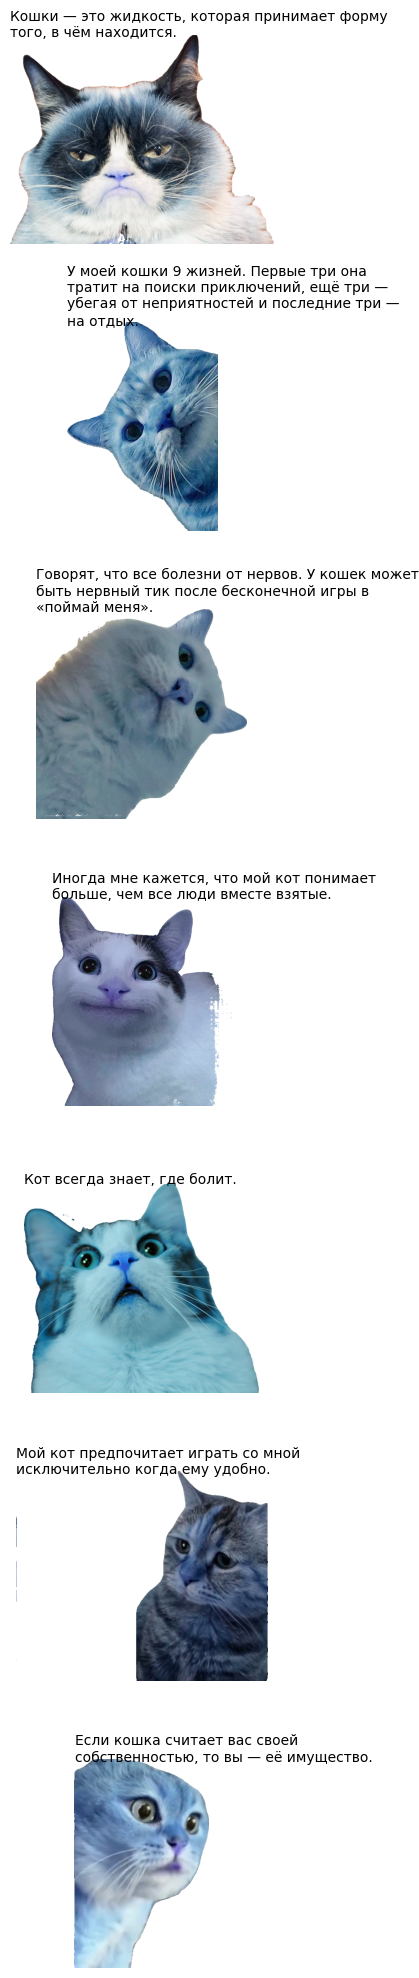

In [147]:
fig,ax = plt.subplots(len(images),1,figsize=(5,20))
for i,(m,im) in enumerate(zip(memes,images)):
    ax[i].imshow(im)
    ax[i].axis('off')
    ax[i].text(0,0,m,wrap=True)
plt.tight_layout(pad=1.5)